## 1. Carga de datos y armado del Dataset.

In [1]:
import pandas as pd
import numpy as np
import datetime as dt

In [2]:
# Importamos los DataFrame
neuquen = pd.read_csv("Neuquen.csv")
rio_negro = pd.read_csv("Rio_Negro.csv")
chubut = pd.read_csv("Chubut.csv")
tierra_del_fuego = pd.read_csv("Tierra_del_Fuego.csv")

In [3]:
# Agregamos la columna Provincia
neuquen['provincia'] = 'Neuquen'
rio_negro['provincia'] = 'Rio Negro'
chubut['provincia'] = 'Chubut'
tierra_del_fuego['provincia'] = 'Tierra del Fuego'

In [4]:
# Unimos los DataFrames en uno solo
patagonia_arg = pd.concat([neuquen, rio_negro, chubut, tierra_del_fuego], ignore_index=True)

In [5]:
# Reseteamos los índices para obtener un DataFrame para utilizar en el desarrollo del Obligatorio
pat_arg = patagonia_arg.reset_index(drop=True)

# Se consultan las columnas que tiene el DataFrame resultante
pat_arg.columns

Index(['id_alojamiento', 'name', 'category', 'rating', 'city', 'latitude',
       'longitude', 'characteristics', 'check_in', 'check_out',
       'price_discounted', 'price_original', 'price_qualifier',
       'cant_resultados', 'fecha_scrapping', 'fecha_cambio_bna', 'cambio_bna',
       'provincia'],
      dtype='object')

In [6]:
# Eliminamos las columnas del DataFrame que no van a ser utilizadas durante el desarrollo del Trabajo Final.
pat_arg.drop(columns=['price_qualifier', 'cant_resultados', 'fecha_scrapping', 'fecha_cambio_bna', 'cambio_bna'], inplace=True)

In [7]:
# Visualizamos algunas filas como ejemplo.
pat_arg.head()

,id_alojamiento,name,category,rating,city,latitude,longitude,characteristics,check_in,check_out,price_discounted,price_original,provincia
0,42980235,Depto. Centro de Neuquén. Wifi. Late check out.,entire_home,"4,71 (165)",Neuquén,-38.952190,-68.057380,"['1 cama', '1 dormitorio', '1 baño', '1 cama d...",2023-07-01,2023-07-06,NaN,$23 USD,Neuquen
1,910778141360333867,Cómodo Monoambiente en Neuquen-zona Alto Comahue,entire_home,Nuevo,Neuquén,-38.942283,-68.064472,"['1 cama', '1 dormitorio', '1 baño', 'Wifi']",2023-08-01,2023-08-08,$14 USD,$18 USD,Neuquen
2,50265327,Moderno monoambiente Neuquino - El Bunker 128,entire_home,"4,62 (47)",Neuquén,-38.957577,-68.050903,"['1 cama', 'Monoambiente', '1 baño', '1 cama d...",2023-07-01,2023-07-06,$20 USD,$22 USD,Neuquen
3,716439197957114546,Hermoso departamento de un dormitorio en Neuquén,entire_home,"4,97 (32)",Neuquén,-38.947662,-68.060772,"['2 camas', '1 dormitorio', '1 baño', '1 cama ...",2023-07-01,2023-07-06,NaN,$49 USD,Neuquen
4,12904217,"Depto 1 dorm céntrico, excelente!",entire_home,"4,83 (122)",Neuquen,-38.953350,-68.052350,"['1 cama', '1 dormitorio', '1 baño', '1 cama d...",2023-07-02,2023-07-07,NaN,$47 USD,Neuquen


In [8]:
# Consultamos la cantidad de filas y columnas del DataFrame.
pat_arg.shape

(1080, 13)

In [9]:
# Solicitamos Info general: cantidad de filas y columnas, nulos por columna, tipo de datos de c/columna, etc.
pat_arg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id_alojamiento    1080 non-null   int64  
 1   name              1080 non-null   object 
 2   category          1080 non-null   object 
 3   rating            886 non-null    object 
 4   city              1076 non-null   object 
 5   latitude          1080 non-null   float64
 6   longitude         1080 non-null   float64
 7   characteristics   1080 non-null   object 
 8   check_in          1080 non-null   object 
 9   check_out         1080 non-null   object 
 10  price_discounted  201 non-null    object 
 11  price_original    1080 non-null   object 
 12  provincia         1080 non-null   object 
dtypes: float64(2), int64(1), object(10)
memory usage: 109.8+ KB


**RESUMEN - CARGA DE DATOS Y ARMADO DEL DATASET:**

1. Las **observaciones** son los alojamientos (anuncios inmobiliarios), que se encuentran dentro de las ciudades pertenecientes a cuatro provincias de la Patagonia Argentina.

2. Las **variables** son: el nombre del alojamiento, la categoria, el rating, la ciudad, las coordenadas de su ubicación (latitud y longitud), sus características, las fechas de consulta de disponibilidad de check in y check out, el precio original y el con descuento, y la provinicia donde se encuentra ubicada.

3. El DataFrame resultante para iniciar el Trabajo cuenta con 1080 filas y 13 columnas.

4. Se observan datos nulos en tres columnas: rating, city y price_discounted.

5. Hay tres filas con datos numéricos (1 int y 2 float), el resto de las columnas contienen datos tipo object.

## 2. Análisis de duplicados.

In [10]:
# Calculamos el número de registros duplicados (iguales para todas sus columnas).
pat_arg.duplicated().value_counts()

,count
False,1029
True,51


In [11]:
# Visualizamos los registos duplicados.
registros_duplicados = pat_arg[pat_arg.duplicated(keep=False)]
registros_duplicados

,id_alojamiento,name,category,rating,city,latitude,longitude,characteristics,check_in,check_out,price_discounted,price_original,provincia
359,25286446,Casita Hillside,entire_home,"4,94 (79)",San Carlos de Bariloche,-41.046010,-71.51584,"['1 cama', '1 dormitorio', '1 baño', '1 cama q...",2023-07-03,2023-07-08,NaN,$120 USD,Rio Negro
360,25286446,Casita Hillside,entire_home,"4,94 (79)",San Carlos de Bariloche,-41.046010,-71.51584,"['1 cama', '1 dormitorio', '1 baño', '1 cama q...",2023-07-03,2023-07-08,NaN,$120 USD,Rio Negro
449,4635954,"ESTUDIO A 20 METROS DEL CIVICO CENTER, VISTA A...",entire_home,"4,68 (175)",San Carlos de Bariloche,-41.133920,-71.31028,"['1 cama', 'Monoambiente', '1 ,5 baños', 'Wifi...",2023-08-03,2023-08-08,NaN,$96 USD,Rio Negro
450,4635954,"ESTUDIO A 20 METROS DEL CIVICO CENTER, VISTA A...",entire_home,"4,68 (175)",San Carlos de Bariloche,-41.133920,-71.31028,"['1 cama', 'Monoambiente', '1 ,5 baños', 'Wifi...",2023-08-03,2023-08-08,NaN,$96 USD,Rio Negro
484,38777312,Cabañas Waldesruh,entire_home,"4,9 (31)",Villa Traful,-40.648600,-71.41879,"['3 camas', '1 dormitorio', '1 baño', '1 cama ...",2023-07-01,2023-07-06,NaN,$70 USD,Rio Negro
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1061,39086940,Sweet Home Depto 3,entire_home,"4,72 (43)",Ushuaia,-54.819020,-68.33556,"['1 cama', '1 dormitorio', '1 baño', '1 cama d...",2023-07-02,2023-07-09,$33 USD,$50 USD,Tierra del Fuego
1062,562143078127144674,Turquesa,entire_home,NaN,Ushuaia,-54.807163,-68.31852,"['1 cama', 'Monoambiente', '1 baño', 'Wifi', '...",2023-07-04,2023-07-11,$58 USD,$64 USD,Tierra del Fuego
1063,51759643,Departamento con vista abierta a las montañas,entire_home,"4,87 (23)",Ushuaia,-54.795000,-68.27643,"['2 camas', '1 dormitorio', '1 baño', '1 cama ...",2023-07-20,2023-07-25,NaN,$50 USD,Tierra del Fuego
1064,8048378,DESAPARTAMENTO SAN MARTÍN - UNIDAD E,entire_home,"4,77 (57)",Ushuaia,-54.807720,-68.30654,"['3 camas', '1 dormitorio', '1 baño', 'Wifi', ...",2023-09-07,2023-09-12,NaN,$95 USD,Tierra del Fuego


In [12]:
# Eliminamos los registros duplicados.
# Consideramos duplicados en todas las columnas (subset=None)
# Nos quedamos con la primer ocurrencia con keep="first".
# Pisamos el dataframe original con inplace.

pat_arg.drop_duplicates(subset=None, keep="first", inplace =True)

# Chequeamos que se hayan eliminado las filas duplicadas.
pat_arg.duplicated().sum()

np.int64(0)

In [13]:
# Se aplica una función para conocer la cantidad de duplicados en cada variable de forma individual
for i in pat_arg.columns:
  duplicados_por_variable = pat_arg.duplicated(subset=[i]).sum()
  print("\033[1;30m" f"Variable: {i}, Nº Duplicados: {duplicados_por_variable}")

Variable: id_alojamiento, Nº Duplicados: 1
Variable: name, Nº Duplicados: 2
Variable: category, Nº Duplicados: 1026
Variable: rating, Nº Duplicados: 565
Variable: city, Nº Duplicados: 948
Variable: latitude, Nº Duplicados: 37
Variable: longitude, Nº Duplicados: 21
Variable: characteristics, Nº Duplicados: 244
Variable: check_in, Nº Duplicados: 921
Variable: check_out, Nº Duplicados: 917
Variable: price_discounted, Nº Duplicados: 939
Variable: price_original, Nº Duplicados: 869
Variable: provincia, Nº Duplicados: 1025


In [14]:
# Se estudia la etiqueta utilizada en la variable category, para reconocer el valor de duplicados razonable en dicha categoria
pat_arg["category"].unique()

array(['entire_home', 'private_room', 'shared_room'], dtype=object)

**RESOLUCIÓN RESPECTO A LOS REPETIDOS EN CADA COLUMNA:**

Se entiende conveniente eliminar los duplicados en la variable *id_alojamiento*, dado que datos duplicados en esa columna implican repeticiones de una misma observación (es su identificador). Asimismo, se entiende conveniente estudiar el comportamiento de los duplicados en *name*, y el conjunto *latitud* - *longitude*.

Por otra parte, no se considera erróneo que existan valores duplicados en el resto de las variables del DataFrame, por lo cual, se entiende que no es necesario aplicar otras modificaciones a los duplicados. En particular, se realizan los siguientes comentarios para algunas de las columnas en estudio:

1.   *provincia:* Tiene 4 opciones ingresadas, por lo tanto, la cantidad mínima de duplicados debe ser de: (N° total de registros - 4). Se comprueba dicho cumplimiento.

2.   *category:* Se entiende que la plataforma de alojamiento proporciona etiquetas específicas para identificar las categorias, en este caso, los valores vistos en la consulta al DataFrame: 'entire_home', 'private_room', 'shared_room', por lo tanto, la cantidad mínima de duplicados debe ser de: (N° total de registros - 3). Se comprueba dicho cumplimiento.

3. *check_in* y *check_out*: Podria pensarse que, dado que los valores obtenidos de duplicados son parecidos, habria que estudiar su comportamiento. Sin embargo, no necesariamente cada vez que se produzca un check_in se abandonará el alojamiento en el mismo plazo (check_out), por lo tanto, es correcto que la cantidad de duplicados para esas dos columnas sean diferente.

In [15]:
# Visualizamos las filas duplicadas en "id_alojamiento"
pat_arg[pat_arg.duplicated(subset=["id_alojamiento"], keep=False)]

,id_alojamiento,name,category,rating,city,latitude,longitude,characteristics,check_in,check_out,price_discounted,price_original,provincia
377,53729814,Pequeña casa,entire_home,"5,0 (36)",San Carlos de Bariloche,-41.14768,-71.31827,"['1 cama', '1 dormitorio', '1 baño', '1 cama d...",2023-08-18,2023-08-23,NaN,$39 USD,Rio Negro
378,53729814,Pequeña casa,entire_home,"5,0 (36)",San Carlos de Bariloche,-41.14768,-71.31827,"['1 cama', '1 dormitorio', '1 baño', '1 cama d...",2023-08-18,2023-08-23,NaN,$39 USD,Rio Negro


In [16]:
#Eliminamos los duplicados para "id_alojamiento" y chequeamos que se haya eliminado correctamente.
pat_arg.drop_duplicates(subset=["id_alojamiento"], inplace=True)

pat_arg.duplicated(subset=["id_alojamiento"]).sum()

np.int64(0)

In [17]:
# Visualizamos las filas duplicadas en "name".
pat_arg[pat_arg.duplicated(subset=["name"], keep=False)]

,id_alojamiento,name,category,rating,city,latitude,longitude,characteristics,check_in,check_out,price_discounted,price_original,provincia
442,797077259992479162,Vista al Lago en el Bosque - Hab Compartida,shared_room,"5,0 (8)",San Carlos de Bariloche,-41.13455,-71.36807,"['1 cama', '1 dormitorio', '1 baño compartido'...",2023-07-11,2023-07-18,NaN,$21 USD,Rio Negro
524,800041160997364459,Vista al Lago en el Bosque - Hab Compartida,shared_room,"5,0 (8)",San Carlos de Bariloche,-41.13330,-71.36914,"['1 cama', '1 dormitorio', '1 baño compartido'...",2023-07-05,2023-07-10,NaN,$23 USD,Rio Negro


**COMENTARIO COLUMNA *name*:**

Analizando los valores repetidos en *name*, y sabiendo de antemano que se correspondian a *id_alojamiento* diferentes (dado que se eliminaron esos duplicados en el paso anterior), se observa que tanto las coordenadas donde se da la repetición (*latitud* y *longitud*), como también los precios, son diferentes. Se interpreta que, para las columnas con *name* repetidos, no hubo error en el ingreso del *id_alojamiento*, lo que hubiera causado que sus identificadores fueran diferentes.

Viendo el valor específico de la repetición, se especula que, un posible causante puede deberse a una misma habitación donde se comparten diferentes espacios dentro de la misma, con diferentes características (por ejemplo, su precio), y eso genera, necesariamente, dos registros diferentes (dos *id_alojamiento* diferentes).

Como generalidad, también se concluye que los valores repetidos de los nombres deberían ser en principio válidos, dado que la columna *name*, no es utilizada como un identificador único para cada alojamiento, y tienen descripciones que pueden ser relativamente genéricas.

In [18]:
# Se estudian los casos en que las coordenadas son iguales (latitud y longitud), para ver si pudo haber algun error en el ingreso del id_alojamiento.
# Para ello primero vemos si hay repeticiones en estas variables.
pat_arg_rep_coord = pat_arg.loc[pat_arg.duplicated(subset=["latitude"], keep=False) & pat_arg.duplicated(subset=["longitude"], keep=False)].sort_values(by=["latitude", "longitude"])
pat_arg_rep_coord.head()

,id_alojamiento,name,category,rating,city,latitude,longitude,characteristics,check_in,check_out,price_discounted,price_original,provincia
889,752426111954594687,Las carmelitas 1 Apartamento,entire_home,"4,96 (23)",Ushuaia,-54.815088,-68.329166,"['2 camas', '1 dormitorio', '1 baño', 'Wifi', ...",2023-08-14,2023-08-19,NaN,$55 USD,Tierra del Fuego
1050,828090107927300389,GRUshuaia,entire_home,NaN,Ushuaia,-54.815088,-68.329166,"['No hay evaluaciones', '1 cama', 'Monoambient...",2023-09-13,2023-09-18,$51 USD,$85 USD,Tierra del Fuego
947,673950561660175390,Las Aguilas 2,entire_home,"4,63 (19)",Ushuaia,-54.814922,-68.341647,"['4 camas', '1 dormitorio', '1 baño', 'Wifi', ...",2023-07-12,2023-07-17,$50 USD,$56 USD,Tierra del Fuego
982,690413283545175725,Las Aguilas 3,entire_home,"4,67 (9)",Ushuaia,-54.814922,-68.341647,"['4 camas', '1 dormitorio', '1 baño', 'Wifi', ...",2023-07-08,2023-07-14,NaN,$50 USD,Tierra del Fuego
822,53848130,Ocean & Mountain View,entire_home,"4,89 (9)",Ushuaia,-54.807163,-68.318520,"['2 camas', '1 dormitorio', '1 baño', '1 cama ...",2023-07-01,2023-07-06,$88 USD,$98 USD,Tierra del Fuego


In [19]:
# Dado que hay repeticiones con la latitud y longitud consultando en simultáneo, se observan las columnas de "rating", "characteristics" y "price_original".
# En caso de que hayan repeticiones en estas tres columnas, interpretaremos que hubo un error en la carga del id_alojamiento. Caso contrario se tomarán como válidas las repeticiones de coordenadas.

pat_arg_rep_coord.loc[pat_arg_rep_coord.duplicated(subset=["rating",  "characteristics", "price_original"])].shape

(0, 13)

**COMENTARIO COLUMNAS *latitude* y *longitude*:**

Se observa que cuando se da la repetición en simultáneo en latitud y longitud, el resto de las características comparadas no se repite, y, por lo tanto, se consideran repeticiones válidas. Se descarta un ingreso incorrecto de *id_alojamiento*.

Además, una repetición en las coordenadas puede ser válida, por ejemplo, considerando que en un mismo edificio de apartamentos u hotel pueden ofrecer varios alojamientos, con diferentes características, y por lo tanto, diferente *id_alojamiento* (aunque mismas coordenadas).

In [20]:
#Cantidad de filas y columnas del dataframe
pat_arg.shape

(1028, 13)

**RESUMEN DE ANÁLISIS DE DUPLICADOS:**

1.   Se encontraron 51 registros duplicados (iguales para todas sus columnas), los cuales fueron eliminados.

2. Se eliminaron los duplicados en la columna *id_alojamiento*, dado que se entiende que es el identificador del alojamiento, y debe ser único.

3.   El DataFrame resultante, luego del tratamiento de duplicados, contiene 1028 registros.

## 3. Análisis de datos faltantes y limpieza.

#### Mostrar el porcentaje de datos faltantes de cada columna: ¿Cuáles son las 3 columnas con más datos faltantes?

In [21]:
#Calculamos porcentaje de datos faltantes para cada columna.
porcentaje_faltantes = ((pat_arg.isnull().sum()/pat_arg.shape[0])*100).round(2).sort_values(ascending=False).reset_index().rename(columns={"index":"variable", 0:"porcentaje_faltantes"})
print("\033[1;30m" "Porcentaje de faltantes por variable")
porcentaje_faltantes

Porcentaje de faltantes por variable


,variable,porcentaje_faltantes
0,price_discounted,81.42
1,rating,18.09
2,city,0.39
3,category,0.00
4,id_alojamiento,0.00
5,name,0.00
6,latitude,0.00
7,characteristics,0.00
8,longitude,0.00
9,check_in,0.00


In [22]:
print("\033[1;30m" f"Se observa que {porcentaje_faltantes['variable'][0]} con un {porcentaje_faltantes['porcentaje_faltantes'][0]}%, {porcentaje_faltantes['variable'][1]} con un {porcentaje_faltantes['porcentaje_faltantes'][1]}%, y {porcentaje_faltantes['variable'][2]} con un {porcentaje_faltantes['porcentaje_faltantes'][2]}% son las tres columnas con más datos faltantes.")

Se observa que price_discounted con un 81.42%, rating con un 18.09%, y city con un 0.39% son las tres columnas con más datos faltantes.


#### Sobre la columna ratings:

In [23]:
# Revisamos los datos de la columna rating
pat_arg['rating'].unique()

array(['4,71 (165)', 'Nuevo', '4,62 (47)', '4,97 (32)', '4,83 (122)',
       '4,56 (94)', '4,91 (33)', '4,95 (19)', '4,25 (4)', '4,86 (56)',
       '4,77 (13)', '5,0 (63)', '4,92 (12)', '5,0 (18)', '4,85 (26)',
       '4,76 (26)', '5,0 (4)', '4,5 (8)', '5,0 (11)', '4,63 (8)',
       '4,8 (25)', '4,68 (22)', '4,75 (4)', '5,0 (3)', '4,96 (23)',
       '5,0 (6)', '4,95 (41)', '5,0 (17)', nan, '5,0 (57)', '4,83 (30)',
       '4,6 (5)', '4,92 (92)', '4,72 (25)', '4,9 (10)', '4,67 (9)',
       '4,84 (85)', '5,0 (7)', '4,79 (43)', '4,91 (69)', '3,33 (3)',
       '4,75 (106)', '4,87 (70)', '5,0 (5)', '4,44 (9)', '4,88 (89)',
       '4,6 (10)', '5,0 (10)', '4,91 (11)', '4,67 (3)', '4,86 (22)',
       '4,88 (25)', '4,9 (67)', '4,33 (6)', '4,86 (35)', '4,94 (16)',
       '4,2 (5)', '4,73 (15)', '4,9 (64)', '4,89 (19)', '5,0 (14)',
       '4,87 (115)', '4,5 (4)', '4,43 (35)', '4,71 (21)', '3,67 (3)',
       '3,0 (3)', '4,92 (25)', '4,73 (11)', '4,5 (17)', '4,83 (6)',
       '5,0 (8)', '5,0 (15)', 

In [24]:
# Se observan valores con entrada "Nuevo", los cuales pueden interpretarse como NaN, y que al inicio de la consulta no aparecen como tal.
nulos_inicial_rating = pat_arg['rating'].isnull().sum()
nuevos_rating = pat_arg["rating"][pat_arg["rating"] == "Nuevo"].count()
print("\033[1;30m" f"Hay {nulos_inicial_rating} valores nulos inicialmente y {nuevos_rating} valores Nuevos. En total, se consideran {nulos_inicial_rating+nuevos_rating} valores NaN.")

Hay 186 valores nulos inicialmente y 116 valores Nuevos. En total, se consideran 302 valores NaN.


In [25]:
#1. Llevarla a un formato donde solo quede el número con punto en vez de coma (ej:1.5), es decir, la columna tiene que quedar de tipo float64 al ejecutar df.info().

pat_arg['rating'] = pat_arg['rating'].str.replace(',', '.')

#Debemos extraer solo la parte numérica de Rating antes de convertirlo a flotante.
#Con esta conversión los valores que indican "Nuevo", se convierten en NaN

pat_arg['rating'] = pat_arg['rating'].str.extract('(\d\.\d)')
pat_arg['rating'] = pat_arg['rating'].astype(float)

#Chequeamos
pat_arg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1028 entries, 0 to 1079
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id_alojamiento    1028 non-null   int64  
 1   name              1028 non-null   object 
 2   category          1028 non-null   object 
 3   rating            726 non-null    float64
 4   city              1024 non-null   object 
 5   latitude          1028 non-null   float64
 6   longitude         1028 non-null   float64
 7   characteristics   1028 non-null   object 
 8   check_in          1028 non-null   object 
 9   check_out         1028 non-null   object 
 10  price_discounted  191 non-null    object 
 11  price_original    1028 non-null   object 
 12  provincia         1028 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 112.4+ KB


In [26]:
#Revisamos el tipo de dato de la columna rating
pat_arg['rating'].info()

<class 'pandas.core.series.Series'>
Index: 1028 entries, 0 to 1079
Series name: rating
Non-Null Count  Dtype  
--------------  -----  
726 non-null    float64
dtypes: float64(1)
memory usage: 16.1 KB


In [27]:
#2. Imputar los valores faltantes utilizando la media de esos valores.
media_rating = pat_arg['rating'].mean()
pat_arg['rating'].fillna(media_rating, inplace=True)

# Chequeamos que no haya más datos faltantes.
pat_arg['rating'].isnull().sum()

<ipython-input-27-787f95387a87>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  pat_arg['rating'].fillna(media_rating, inplace=True)


np.int64(0)

In [28]:
#3. Crear una variable llamada habitaciones_best_reviews que para cada fila tenga el valor True si el rating es 5.0 y el valor False si tiene un rating menor.

def best_reviews(x):
    if x == 5.0:
        return "True"
    else:
        return "False"

pat_arg['habitaciones_best_reviews'] = pat_arg['rating'].apply(best_reviews)

# Chequeamos
check_best_review = pat_arg[["rating", "habitaciones_best_reviews"]].sample(15)
print(check_best_review)

        rating habitaciones_best_reviews
626   4.500000                     False
664   4.811295                     False
540   4.811295                     False
1056  4.900000                     False
117   4.811295                     False
730   4.811295                     False
1074  4.811295                     False
299   4.700000                     False
789   4.900000                     False
257   4.811295                     False
578   4.500000                     False
72    4.700000                     False
890   4.811295                     False
741   4.811295                     False
573   4.900000                     False


In [29]:
#4. ¿Cuál es el porcentaje de publicaciones que cumplen el criterio de best reviews?

porcentaje_best_reviews = pat_arg['habitaciones_best_reviews'].value_counts()["True"]/pat_arg.shape[0]*100
print("\033[1;30m" f"El porcentaje de publicaciones que cumplen el criterio de best reviews es: {porcentaje_best_reviews:.2f}%")

El porcentaje de publicaciones que cumplen el criterio de best reviews es: 15.66%


#### Sobre la columna price_original:

In [30]:
# Analizamos los datos que arroja la columna price_original
pat_arg['price_original'].unique()

array(['$23\xa0USD', '$18\xa0USD', '$22\xa0USD', '$49\xa0USD',
       '$47\xa0USD', '$29\xa0USD', '$28\xa0USD', '$27\xa0USD',
       '$19\xa0USD', '$45\xa0USD', '$35\xa0USD', '$63\xa0USD',
       '$44\xa0USD', '$42\xa0USD', '$41\xa0USD', '$40\xa0USD',
       '$32\xa0USD', '$51\xa0USD', '$12\xa0USD', '$24\xa0USD',
       '$98\xa0USD', '$30\xa0USD', '$50\xa0USD', '$60\xa0USD',
       '$31\xa0USD', '$79\xa0USD', '$114\xa0USD', '$77\xa0USD',
       '$39\xa0USD', '$26\xa0USD', '$156\xa0USD', '$48\xa0USD',
       '$119\xa0USD', '$34\xa0USD', '$88\xa0USD', '$85\xa0USD',
       '$97\xa0USD', '$90\xa0USD', '$36\xa0USD', '$25\xa0USD',
       '$70\xa0USD', '$20\xa0USD', '$72\xa0USD', '$80\xa0USD',
       '$57\xa0USD', '$55\xa0USD', '$13\xa0USD', '$59\xa0USD',
       '$99\xa0USD', '$33\xa0USD', '$68\xa0USD', '$73\xa0USD',
       '$100\xa0USD', '$87\xa0USD', '$150\xa0USD', '$104\xa0USD',
       '$91\xa0USD', '$74\xa0USD', '$75\xa0USD', '$67\xa0USD',
       '$9\xa0USD', '$52\xa0USD', '$71\xa0USD', '

In [31]:
#1. Llevarla a un formato donde solo quede el número entero (ej: 107), es decir, la columna tiene que quedar de tipo int64 al ejecutar df.info()

# Debemos extraer solo la parte numérica de price_original antes de convertirlo a entero.
pat_arg['price_original'] = pat_arg['price_original'].str.extract('(\d+)')
# Convertimos la columna price_original a formato int con astype.
pat_arg['price_original'] = pat_arg['price_original'].astype(int)

# Chequeamos tipo de dato
pat_arg['price_original'].info()

<class 'pandas.core.series.Series'>
Index: 1028 entries, 0 to 1079
Series name: price_original
Non-Null Count  Dtype
--------------  -----
1028 non-null   int64
dtypes: int64(1)
memory usage: 16.1 KB


#### Sobre la columna price_discounted

In [32]:
#El objetivo final es crear una columna discounted que tenga valor True si la publicación tenía descuento y False si no la tenía.

# Primero extraemos solo la parte numérica de price_discounted.
pat_arg['price_discounted'] = pat_arg['price_discounted'].str.extract('(\d+)')
#1. Imputamos los NAN de price_discounted con el valor de price_original de esa fila.
pat_arg['price_discounted'].fillna(pat_arg['price_original'], inplace=True)
#2. Convertimos la columna price_discounted a formato int con astype.
pat_arg['price_discounted'] = pat_arg['price_discounted'].astype(int)

# Chequeamos tipo de dato
pat_arg['price_discounted'].info()

<class 'pandas.core.series.Series'>
Index: 1028 entries, 0 to 1079
Series name: price_discounted
Non-Null Count  Dtype
--------------  -----
1028 non-null   int64
dtypes: int64(1)
memory usage: 16.1 KB


<ipython-input-32-a65ed224fcf2>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  pat_arg['price_discounted'].fillna(pat_arg['price_original'], inplace=True)


In [33]:
# Chequeamos consistencia interna de Precios con descuento. El precio original debe ser igual o mayor al precio con descuento.
incosistencia_descuento = (pat_arg['price_original'] - pat_arg['price_discounted']).apply(lambda x: "inconsistencia" if x < 0 else "Sin inconsistencia")
incosistencia_descuento.value_counts()

,count
Sin inconsistencia,1028


In [34]:
# Creamos la función para definir una columna Discounted con valor True para las publicaciones con descuento.
def p_discounted(row):
    if row['price_original'] > row['price_discounted']:
        return True
    else:
        return False

# Aplicamos la función a cada fila usando apply con axis=1 para indicar que se aplica a filas.
pat_arg['discounted'] = pat_arg.apply(p_discounted, axis=1)

# Chequeamos
pat_arg.loc[:, ["price_original", "price_discounted", "discounted"]].sample(10)

,price_original,price_discounted,discounted
497,40,40,False
424,26,26,False
125,118,94,True
505,80,80,False
144,180,180,False
120,79,79,False
1050,85,51,True
142,32,32,False
686,40,40,False
381,47,47,False


### Sobre la variable ciudad (utilizado para el punto 6)

In [35]:
# Instalamos fuzzywuzzy
!pip install fuzzywuzzy

from fuzzywuzzy import fuzz
from fuzzywuzzy import process

/usr/local/lib/python3.11/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [36]:
# Se comienza analizando la columna "city"
pat_arg["city"].unique()

array(['Neuquén', 'Neuquen', 'BVH', 'Cipolletti', 'MDJ', 'Plottier',
       'Confluencia', 'Centenario', nan, 'Q8302ATE', 'JKB', 'Las Perlas',
       'KCN', 'Q8300MDJ', 'Confluencia Department',
       'San Martín de Los Andes', 'BGJ', 'Villa Traful',
       'Villa La Angostura', 'San Carlos de Bariloche', 'Bariloche',
       'San Martin de los Andes', 'Dina Huapi', 'Lácar',
       'San Martín de los Andes', 'La Villa',
       'San Carlos de Bariloche-  Península de San Pedro',
       'Villa la Angostura ', 'Los Lagos', 'Puerto Manzano', 'Bariloche ',
       'San Carlos de Bariloche, Río Negro, AR', 'Viedma',
       'Lácar Department', 'Villa La Angostura, Neuquén Argentina',
       'Las grutas', 'Las Grutas', 'Villa la Angostura', 'El Bolsón',
       'Junín de los Andes', 'Los Lagos Department', 'Villa Llao Llao',
       'Puerto Madryn', 'Comodoro Rivadavia', 'Trelew', 'Esquel',
       'Puerto Piramides', 'Puerto Pirámides', 'Trevelin', 'Cholila',
       'Epuyén', 'Playa Unión', 'Lago

In [37]:
# Se observan la cantidad de ciudades únicas y los valores nulos.
ciudades = len((pat_arg["city"].unique()))
ciudades_nulas = pat_arg["city"].isnull().sum()
print("\033[1;30m" f"Aparentemente hay {ciudades} ciudades, aunque se observa que hay algunas ingresadas con espacios en blanco y otras con diferentes caracteres.")
print("\033[1;30m" f"Se observa que hay {ciudades_nulas} valores nulos en la columna city.")

Aparentemente hay 81 ciudades, aunque se observa que hay algunas ingresadas con espacios en blanco y otras con diferentes caracteres.
Se observa que hay 4 valores nulos en la columna city.


In [38]:
# Se estudian los valores nulos y se imputan mediante georreferenciación de las ciudades correspondientes, observando los valores de latitud y longitud.
ajuste_nulos_city = pat_arg[pat_arg["city"].isnull()][["id_alojamiento", "name", "latitude", "longitude", "provincia"]]
ajuste_nulos_city

,id_alojamiento,name,latitude,longitude,provincia
119,21927225,"Casa de campo sobre ruta 22- ""Brisas del Limay""",-38.956790,-68.261010,Neuquen
374,577367191901514783,Cabaña de MONTAÑA con excelente vista.,-40.143132,-71.273665,Rio Negro
410,24602649,Casa nueva moderna de 2 morenos,-41.073160,-71.501960,Rio Negro
475,4985036,LAGO Y VISTAS STUDIO1 CERCA DEL ACCESO A LA PL...,-41.050170,-71.499430,Rio Negro


In [39]:
# Se importa librería para coordenadas georreferenciadas.
from geopy.geocoders import Nominatim

# Se crea el objeto geolocator
geolocator = Nominatim(user_agent="my_app")

# Se convierten las coordenadas a lista
coordenadas = ajuste_nulos_city[["latitude", "longitude"]].values.tolist()

for coordenada in coordenadas:
  location = geolocator.reverse(coordenada)
  address = location.raw['address']
  state_district = address.get('state_district', '')
  pat_arg.loc[(pat_arg["latitude"] == coordenada[0]) & (pat_arg["longitude"] == coordenada[1]), "city"] = state_district
  print(f"Coordenadas: {coordenada} , Localidad: {state_district}")

Coordenadas: [-38.95679, -68.26101] , Localidad: Departamento Confluencia
Coordenadas: [-40.143132, -71.273665] , Localidad: Departamento Lácar
Coordenadas: [-41.07316, -71.50196] , Localidad: Departamento Bariloche
Coordenadas: [-41.05017, -71.49943] , Localidad: Departamento Bariloche


In [40]:
#Se genera una nueva columna para city donde se pasa el string a minúscula y se quitan los espacios en blanco
pat_arg["city_clean"] = pat_arg["city"].str.lower().str.strip().astype(str)

In [41]:
# Se introducen las ciudades de cada provincia obtenidas de consulta al DataFrame.
# Idealmente se deberían generar listas con todas las ciudades pertenecientes a cada provincia, aunque en este caso, se utilizaron únicamente las observadas en el DataFrame.

# Lista de ciudades de cada provincia.
rio_negro_cities = ["bariloche", "dina huapi", "el bolson", "lacar", "las grutas", "los lagos", "puerto manzano",
                    "viedma", "villa llao llao", "villa traful", "villa la angostura"]
neuquen_cities = ["centenario", "cipolleti", "confluencia", "neuquen", "plottier", "san martin de los andes"]
chubut_cities = ["biedma", "camarones", "cholila", "comodoro rivadavia", "corcovado", "cushamen", "el hoyo", "epuyen", "esquel", "gaiman", "gobernador costa",
                 "lago puelo", "playa union", "puerto madryn", "puerto piramides", "rada tilly", "trelew", "trevelin"]
tierra_del_fuego_cities = ["rio grande", "tolhuin", "ushuaia"]

# Ciudades de las 4 ciudades de la Patagonia Argentina
cities = pd.Series(rio_negro_cities + neuquen_cities + chubut_cities + tierra_del_fuego_cities)

In [42]:
# Se realiza un bucle para recorrer las ciudades y en caso que la coincidencia sea de al menos 80% del partial fuzzy, se reemplaza por el valor correcto.

for ciudad_correcta in cities:
  pat_arg["city_clean"] = pat_arg["city_clean"].apply(lambda x: ciudad_correcta if fuzz.partial_ratio(ciudad_correcta, x) >= 80 else x)

In [43]:
pat_arg["city_clean"].sort_values().unique()

array(['aiu', 'ajk', 'awf', 'bariloche', 'bax', 'bdp', 'bgj', 'biedma',
       'bmr', 'bvh', 'camarones', 'centenario', 'cholila', 'cipolleti',
       'comodoro rivadavia', 'confluencia', 'corcovado', 'cushamen',
       'dff', 'did', 'dina huapi', 'dnd', 'dsb', 'dwc', 'el bolson',
       'el hoyo', 'epuyen', 'esquel', 'gaiman', 'gobernador costa', 'jkb',
       'junín de los andes', 'kcn', 'la villa', 'lacar', 'lago puelo',
       'las grutas', 'las perlas', 'los lagos', 'mdj', 'neuquen',
       'playa magagna', 'playa union', 'plottier', 'puerto madryn',
       'puerto manzano', 'puerto piramides', 'q8300mdj', 'q8302ate',
       'rada tilly', 'rawson', 'rio grande', 'san martin de los andes',
       'tolhuin', 'trelew', 'trevelin', 'ushuaia', 'villa la angostura',
       'villa llao llao', 'villa traful'], dtype=object)

In [44]:
cantidad_city_clean = len((pat_arg["city_clean"].unique()))
mejora_city_clean = round(((ciudades-cantidad_city_clean)/ciudades)*100, 0)
print("\033[1;30m" f"Se pasa de {ciudades} ciudades, a obtener, luego del tratamiento, {cantidad_city_clean} ciudades. Equivale a una mejora de {mejora_city_clean}%")

Se pasa de 81 ciudades, a obtener, luego del tratamiento, 60 ciudades. Equivale a una mejora de 26.0%


**RESUMEN DE ANÁLISIS DE DATOS FALTANTES Y LIMPIEZA**

1. Hay tres columnas con datos faltantes, el resto de las columnas no tienen datos faltantes en la consulta correspondiente.

2. En la columna *rating* se imputaron 302 valores nulos (incluyendo los Nuevos), con el promedio.

3. Hay un 15,66% de alojamientos calificados con 5,0 (nivel máximo).

4. En la variable *price_discounted* se rellenan más del 80% (correspondientes a valores NaN), con el valor de *price_original*, por lo tanto, las columnas van a ser similares.

5. En la variable *city* se observaron inicialmente 81 ciudades, pero aplicando limpieza, se obtuvieron como resultado 60, mejorando un 26% los valores observados. Si bien se puede especular una posible necesidad de Sanity Check en las ciudades y provincias, no se realiza dicha evaluación, dado que se tendria que tener mayor conocimiento de las ciudades por provincia.

6. El DataFrame resultante, a partir de trabajar con datos faltantes y aplicar limpieza, cuenta con 1028 registros y 16 variables. Las variables adicionadas son: "habitaciones_best_review", "discounted", solicitadas por letra, y la variable "city_clean", adicionada para posterior análisis en punto 6.

## 4. Análisis general de precios.

In [45]:
#1.¿Cuántos alquileres con descuento hay?
num_discounted = pat_arg['discounted'].sum()
print("\033[1;30m" f"El número de alquileres con descuento es: {num_discounted}")

El número de alquileres con descuento es: 191


In [46]:
#2.¿Cuál es el alquiler más caro? ¿Y el más barato?
# Consdierando que se solicita los precios máximos y mínimos en general, se considera lo siguiente:
# la columna price_original siempre tendrá el precio más alto del alquiler, y por lo tanto, se utiliza dicha columna.
# la columana price_discounted siempre tendrá el precio más bajo del alquiler, y por lo tanto, se utiliza dicha columna.

max_price = pat_arg['price_original'].max()
min_price = pat_arg['price_discounted'].min()

print("\033[1;30m" f"El alquiler más caro es: {max_price}")
print("\033[1;30m" f"El alquiler más barato es: {min_price}")

El alquiler más caro es: 699
El alquiler más barato es: 9


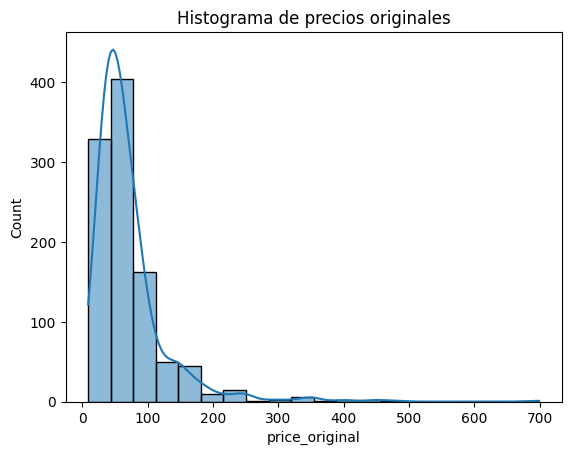

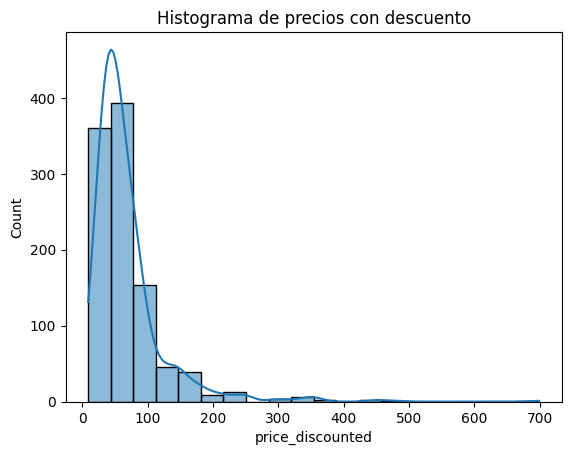

In [47]:
#Mostrar 2 histogramas de los precios originales y los precios con descuento. ¿Observa alguna diferencia?

#Importamos librerías para graficar.
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(pat_arg['price_original'], bins = 20, kde=True)
plt.title('Histograma de precios originales')
plt.show()

sns.histplot(pat_arg['price_discounted'], bins=20, kde=True)
plt.title('Histograma de precios con descuento')
plt.show()

**COMENTARIO - HISTOGRAMAS PRECIO ORIGINAL Y CON DESCUENTO:**

#### Considerando que en la columna *price_discounted* fueron imputados los NANs con los valores de *price_original* (es decir, la columna expresa el precio original del alojamiento), y que los precios con descuento representan menos de un 20% del total (191/1028), entendemos pertinente la similitud entre ambos histogramas. De todas formas se destaca mayor cantidad de frecuencia en los alquileres del primer Bin (precios más bajos) en la columna *price_discounted*, lo cual demuestra la consistencia interna de los datos.

## 5. Discretización de precios.

### Crear una nueva columna **price_category** en base a la distribución de precios **(price_original)** pero discretizando en intervalos de igual ancho con la siguientes etiquetas para esos bins: ['bajo', 'medio', 'alto'].

In [48]:
# Lista de etiquetas
etiquetas_price = ["bajo", "medio", "alto"]

# Discretizamos la variable "price_original" en intervalos de igual ancho, y se crea una nueva columna "price_category"
pat_arg["price_category"] = pd.cut(x=pat_arg["price_original"], bins=3, labels=etiquetas_price)
pat_arg["price_category"].sample(10)

,price_category
1,bajo
849,bajo
814,bajo
164,bajo
417,bajo
244,bajo
452,bajo
765,bajo
972,medio
1057,bajo


In [49]:
# Cálculo del ancho de la variable price_category
ancho_price_category = (pat_arg["price_original"].max()-pat_arg["price_original"].min())/len(etiquetas_price)
print("\033[1;30m" f"El ancho del intervalo utilizado para la creación de la variable price_category es: {ancho_price_category}")

El ancho del intervalo utilizado para la creación de la variable price_category es: 230.0


In [50]:
# Conteo de la frecuencia con discretización de igual ancho.
pat_arg["price_category"].value_counts().reset_index()

,price_category,count
0,bajo,1003
1,medio,23
2,alto,2


### Hacer un gráfico de barras con esta nueva columna ¿Qué se observa?

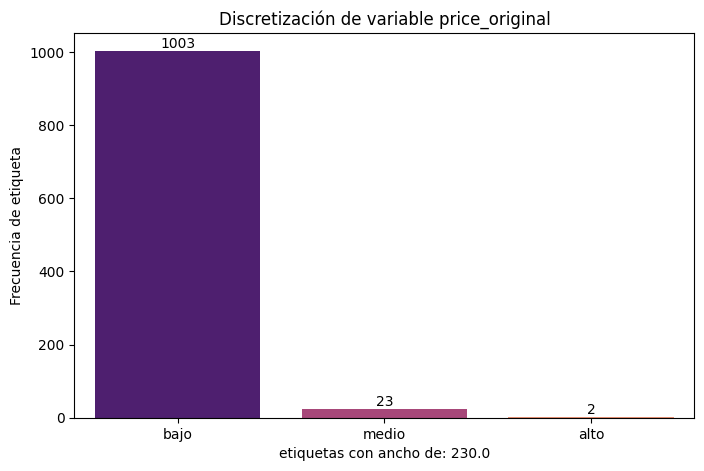

In [51]:
#Gráfico de barras de la columna "price_category", con la discretización de igual ancho en la variable "price_original".

#Definimos el tamaño de la figura y ploteamos.
plt.figure(figsize=(8,5))

ax = sns.barplot(x=etiquetas_price, y=pat_arg.groupby("price_category", observed=False).size(), hue=etiquetas_price, legend=False, palette="magma")
plt.title("Discretización de variable price_original")
plt.xlabel(f"etiquetas con ancho de: {ancho_price_category}")
plt.ylabel("Frecuencia de etiqueta")

#Añadimos el valor de la frecuencia para cada etiqueta.
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

**COMENTARIO - DISCRETIZACIÓN Y GRÁFICO DE BARRAS:**

De la gráfica de barras se observa que los precios de los alquileres se encuentran, en su mayoría (1003), dentro de la primer franja de discretización, asociada a un precio "bajo". Por lo tanto, se observa que la mayoría de los precios se encuentran por debajo de 230 (ancho de intervalo para la discretización).

Por otra parte, prácticamente no hay opciones de alojamientos con precios superiores a 460 (únicamente 2 alojamientos), y muy pocos dentro del rango medio (23).

## 6. Análisis por provincia / ciudad

Agrupar por la columna provincia, de modo que queden 4 grupos. Sobre ese DataFrame agrupado responder las preguntas:

In [52]:
# Creamos el DataFrame agrupado por las cuatro provincias
pat_arg_prov = pat_arg.groupby("provincia")
pat_arg_prov.ngroups

4

### ¿Cuántos alquileres con descuento hay por provincia?

In [53]:
# Se realiza el conteo de alquileres con descuento, agrupado por provincia.
# Dado que se utiliza la columna "discount", el conteo arroja la totalidad de valores True y False por provincia, y posteriormente se realiza el filtrado.

alquiler_desc_prov = pat_arg_prov["discounted"].value_counts().reset_index()
alquiler_desc_prov = alquiler_desc_prov.loc[alquiler_desc_prov["discounted"] == True].drop(columns=["discounted"])
print("\033[1;30m" "Cantidad de alquileres con descuento por provincia")
alquiler_desc_prov.rename(columns={"count":"alquiler_con_descuento"})

Cantidad de alquileres con descuento por provincia


,provincia,alquiler_con_descuento
1,Chubut,45
3,Neuquen,37
5,Rio Negro,46
7,Tierra del Fuego,63


In [54]:
#Se realiza un bucle para imprimir cuantos son los alquileres con descuento por provincia
for provincia, cantidad in zip(alquiler_desc_prov["provincia"], alquiler_desc_prov["count"]):
    print("\033[1;30m" f"La provincia de {provincia} tiene {cantidad} alquileres con descuento.")

La provincia de Chubut tiene 45 alquileres con descuento.
La provincia de Neuquen tiene 37 alquileres con descuento.
La provincia de Rio Negro tiene 46 alquileres con descuento.
La provincia de Tierra del Fuego tiene 63 alquileres con descuento.


### De cada provincia: ¿Cuál es el alquiler más caro? ¿Y el más barato?.

In [55]:
# Se obtiene el valor de alquiler máximo y mínimo para cada provincia, renombrando las columnas acorde a lo solicitado.
limit_price_prov = pat_arg_prov.agg(alquiler_mas_caro = ("price_original", "max") ,alquiler_mas_barato = ("price_discounted", "min")).reset_index()
print("\033[1;30m" "Precios limite de alquileres por provincia")
limit_price_prov

Precios limite de alquileres por provincia


,provincia,alquiler_mas_caro,alquiler_mas_barato
0,Chubut,350,10
1,Neuquen,220,9
2,Rio Negro,699,20
3,Tierra del Fuego,480,12


In [56]:
# Se realiza un bucle para imprimir cuáles son los alquileres más caros y más baratos para cada provincia
for provincia, precio_max, precio_min in zip(limit_price_prov["provincia"], limit_price_prov["alquiler_mas_caro"], limit_price_prov["alquiler_mas_barato"]):
  print("\033[1;30m" f"El alquiler más caro para la provincia de {provincia} es de {precio_max} y el más barato es de {precio_min}.")

El alquiler más caro para la provincia de Chubut es de 350 y el más barato es de 10.
El alquiler más caro para la provincia de Neuquen es de 220 y el más barato es de 9.
El alquiler más caro para la provincia de Rio Negro es de 699 y el más barato es de 20.
El alquiler más caro para la provincia de Tierra del Fuego es de 480 y el más barato es de 12.


### ¿Qué ciudad tiene más publicaciones con descuento? ¿En qué ciudad se encuentra el precio más caro? ¿Y el más barato?

In [57]:
# Se crea un DataFrame agrupado por provincia y por ciudad ajustada (city_clean).
pat_arg_city = pat_arg.groupby(["provincia", "city_clean"])

In [58]:
# Ciudad con más publicaciones con descuento
pat_arg_city_discounted = pat_arg.loc[pat_arg["discounted"] == True].groupby(["provincia", "city_clean"])
pat_arg_city_discounted = pat_arg_city_discounted.agg(ciudad_mas_publicaciones_desc = ("discounted", "count")).sort_values(by="ciudad_mas_publicaciones_desc", ascending=False).reset_index()
print("\033[1;30m" "Ciudad con más publicaciones con descuento")
pat_arg_city_discounted.head(1)

Ciudad con más publicaciones con descuento


,provincia,city_clean,ciudad_mas_publicaciones_desc
0,Tierra del Fuego,ushuaia,57


In [59]:
print("\033[1;30m" f"La ciudad con más publicaciones con descuento es {pat_arg_city_discounted['city_clean'][0]}, con un total de {pat_arg_city_discounted['ciudad_mas_publicaciones_desc'][0]} publicaciones.")


La ciudad con más publicaciones con descuento es ushuaia, con un total de 57 publicaciones.


In [60]:
alquiler_por_ciudad = pat_arg_city.agg(alquiler_mas_caro = ("price_original", "max") ,alquiler_mas_barato = ("price_discounted", "min"))
print("\033[1;30m" "Precios limite de alquileres por ciudad")
alquiler_por_ciudad

Precios limite de alquileres por ciudad


alquiler_mas_caro  alquiler_mas_barato
provincia        city_clean                                                
Chubut           biedma                             78                   38
                 camarones                         158                  114
                 cholila                           200                  100
                 comodoro rivadavia                 79                   25
                 corcovado                          34                   34
...                                                ...                  ...
Tierra del Fuego dsb                                26                   26
                 dwc                                23                   20
                 rio grande                         95                   25
                 tolhuin                            79                   40
                 ushuaia                           480                   12

[62 rows x 2 columns]

**COMENTARIO SANITY CHECK:**

Se observa la necesidad de realizar un Sanity Check en la variable de ciudad en conjunto con Provincia dado que la consulta de ciudades únicas anteriormente arrojó un valor de 60, y la cantidad de registros del DataFrame agrupado indica 62. Por lo tanto, ocurre que hay ciudades que se llaman de forma idéntica, pero pertenecen a diferentes provincias. Quizás esté correcto, pero convendría investigarlo, y se supone que esto sucedió por una imputación incorrecta en la base de datos.

In [61]:
print("\033[1;30m" "Ciudad con el alquiler más caro")
alquiler_por_ciudad.loc[alquiler_por_ciudad["alquiler_mas_caro"] == alquiler_por_ciudad["alquiler_mas_caro"].max()].drop(columns=["alquiler_mas_barato"])

Ciudad con el alquiler más caro


,,alquiler_mas_caro
provincia,city_clean,
Rio Negro,bariloche,699


In [62]:
print("\033[1;30m" "Ciudades con los alquileres más baratos")
alquiler_por_ciudad.loc[alquiler_por_ciudad["alquiler_mas_barato"] == alquiler_por_ciudad["alquiler_mas_barato"].min()].drop(columns=["alquiler_mas_caro"])

Ciudades con los alquileres más baratos


alquiler_mas_barato
provincia city_clean                     
Neuquen   cipolleti                     9
          neuquen                       9

**RESUMEN DE ANÁLISIS POR PROVINCIA / CIUDAD**

1. La provincia con el alquiler más caro es Río Negro, siendo Bariloche, la ciudad con dicho alquiler, el cual se corresponde con 699.

2. La provincia con el alquiler más barato es Neuquén, siendo Cipolletti y la ciudad de Neuquén, las ciudades que presentan dichos alquileres, los cuales se corresponden con 9.

3. La cantidad total de alquileres con descuento es 191, corroborándose con el valor observado en el punto 4. La provincia que presenta más alquileres con descuento es Tierra del Fuego con 63, y la ciudad que tiene más, es Ushuaia (perteneciente a dicha provincia), con un total de 57.

### Realice 2 gráficos de cajas (boxplots) mostrando en uno la distribución de precios originales por provincia, y en otro la distribución de ratings por provincia.

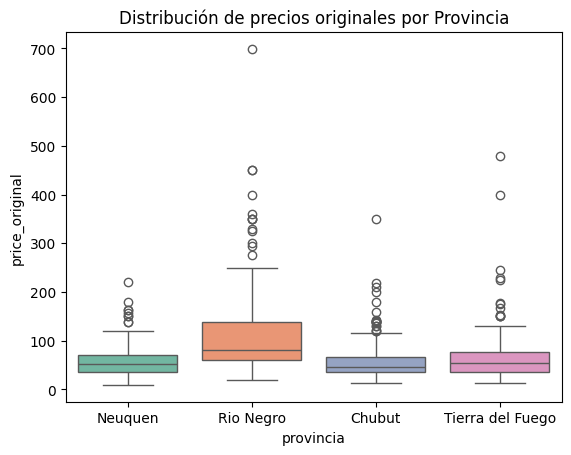

In [63]:
#Grafico boxplot de distribución de precios originales por provincia
sns.boxplot(y="price_original", x="provincia", data=pat_arg,  hue="provincia", palette="Set2")
plt.title('Distribución de precios originales por Provincia')
plt.show()

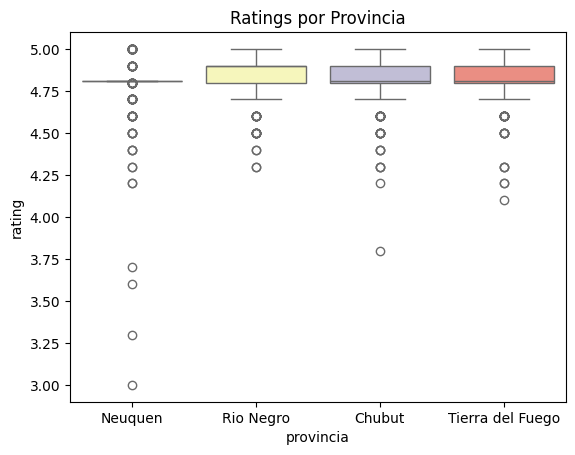

In [64]:
#Grafico boxplot de distribución de ratings por provincia.
sns.boxplot(y="rating", x="provincia", data=pat_arg, hue="provincia", palette="Set3")
plt.title('Ratings por Provincia')
plt.show()

**COMENTARIOS - BOXPLOTS:**

Mediante la visualización de los boxplots, se observa la serie de datos a través de sus cuartiles, para los precios originales y calificaciones, en función de las provincias, y, a simple vista, se destaca una cierta cantidad de valores atípicos.

En cuanto a los precios, Rio Negro y Tierra del Fuego, aparentan tener la mayor variablilidad, siendo que para Neuquen y Chubut no se presentan precios por encima de 250 y 400, respectivamente.

En cuanto al rating, Neuquén presenta la situación con mayor variablidad en calificaciones, en el rango de 3 a 5 estrellas, mientras que el resto de las provincias no se presentan calificaciones por debajo de 3,75.


## 7. Características del alojamiento.

#### Poniendo el foco en la columna characteristics, ¿El dataset se encuentra en formato tidy? ¿Por qué?

In [65]:
# Analizamos la columna
pat_arg["characteristics"].sample(20)

,characteristics
633,"['1 cama', '1 dormitorio', '1 baño privado']"
708,"['8 camas', '4 dormitorios', '3,5 baños', 'Cal..."
900,"['1 cama', '1 dormitorio', '2 baños', 'Wifi', ..."
503,"['1 baño privado', '1 cama queen', 'Estacionam..."
781,"['2 camas', '1 dormitorio', '2 camas de una pl..."
413,"['1 baño', '1 cama queen', '2 camas de una pla..."
402,"['4 camas', '2 dormitorios', '2 baños', '1 cam..."
108,"['6 camas', '4 dormitorios', '1 baño', 'Estaci..."
1031,"['1 cama', '1 dormitorio', '1,5 baños comparti..."
241,['No hay evaluaciones']


**COMENTARIO - COLUMNA "CHARACTERISTICS":**

##### La columna no se encuentra en formato tidy: cada columna de un dataframe debe contener datos de una sola variable. En este caso los datos están agrupados en listas dentro de la misma columna "characteristics". Para que se pueda considerar en formato tidy, las características como 'número de camas', 'número de dormitorios', etc., deberían estar en columnas separadas.

#### Deberán construir las columnas baños, dormitorios y camas con la cantidad de baños, dormitorios y camas y obtenidos de la columna characteristics.


In [66]:
# Para construir las columnas solicitadas debemos realizar extracción de datos de la columna "characteristics".

# Primero limpiamos la columna characteristics, eliminando comillas y separando por comas (split, replace)
pat_arg["characteristics"] = pat_arg["characteristics"].astype(str)
pat_arg["characteristics"] = pat_arg["characteristics"].str.strip("[]").str.replace("'", "").str.split(", ")

# Chequeamos
pat_arg["characteristics"].head(10)

,characteristics
0,"[1 cama, 1 dormitorio, 1 baño, 1 cama doble, W..."
1,"[1 cama, 1 dormitorio, 1 baño, Wifi]"
2,"[1 cama, Monoambiente, 1 baño, 1 cama doble, E..."
3,"[2 camas, 1 dormitorio, 1 baño, 1 cama king, 1..."
4,"[1 cama, 1 dormitorio, 1 baño, 1 cama doble, E..."
5,"[2 camas, 1 dormitorio, 1 baño, 1 cama doble, ..."
6,"[2 camas, 1 dormitorio, 1 baño, 1 cama de una ..."
7,"[2 camas, 1 dormitorio, 1 baño, 1 cama doble, ..."
8,"[1 cama, Monoambiente, 1 baño, 1 cama doble, E..."
9,"[1 cama, 2 dormitorios, 1,5 baños compartidos,..."


In [67]:
# Definimos una función para extraer valores usando Regex (pattern matching/extraction).
# Se usa re.findall() para que devuelva todas las ocurrencias del patrón indicado.

import re

# INTENTO 1.
def extraer_cantidad(characteristics, habitacion):
    #Debe captar números enteros y decimales para los casos 1,5 baños,etc
    patron = rf"(\d+(?:,\d+)?)\s*{habitacion}"
    for item in characteristics:
        match = re.findall(patron, item)
        if match:
            return sum(float(match.replace(',', '.')) for match in match)
    else:
      return None

#Chequeamos la función
testeo_funcion = ["1 cama", "1 dormitorio", "1 ,5 baños", "1 cama doble", "Wifi"]
print(extraer_cantidad(testeo_funcion, "cama"))
print(extraer_cantidad(testeo_funcion, "dormitorio"))
print(extraer_cantidad(testeo_funcion, "baño"))

#LA FUNCIÓN NO ES CORRECTA. Se debe ajustar el código para que devuelva: 2 camas.
#Además no contempla casos con espacio entre decimales como el de fila observadas (112, 571).

1.0
1.0
5.0


In [68]:
# INTENTO 2.
# Se modifica la función para optimizar la extracción de los valores
def extraer_cantidad_2(characteristics, habitacion):
    #Patrón ajustado con ayuda de Chatgpt: capturando espacios alrededor de la coma en los decimales
    patron = rf"(\d+\s*,?\s*\d*)\s*{habitacion}"
    matches = re.findall(patron, " ".join(characteristics))
    if matches:
    #Eliminamos espacios en blanco dentro en las coincidencias y convertimos a valores decimales para sumar
        return sum(float(match.replace(' ', '').replace(',', '.')) for match in matches)
    return None

#Chequeamos opción 2
testeo_funcion_2 = ["1 cama", "1 dormitorio", "1 ,5 baño", "1 cama doble", "Wifi"]
print(extraer_cantidad_2(testeo_funcion, 'cama'))
print(extraer_cantidad_2(testeo_funcion, 'dormitorio'))
print(extraer_cantidad_2(testeo_funcion, 'baño'))

2.0
1.0
1.5


In [69]:
# Aplicamos la función para extraer cantidades de baños, dormitorios y camas
pat_arg['baños'] = pat_arg['characteristics'].apply(lambda x: extraer_cantidad_2(x, 'baño'))
pat_arg['dormitorios'] = pat_arg['characteristics'].apply(lambda x: extraer_cantidad_2(x, 'dormitorio'))
pat_arg['camas'] = pat_arg['characteristics'].apply(lambda x: extraer_cantidad_2(x, 'cama'))

#Chequeamos
pat_arg[['characteristics', 'baños', 'dormitorios', 'camas']].sample(10)

,characteristics,baños,dormitorios,camas
601,"[2 camas, Monoambiente, 1 baño, 1 cama doble, ...",1.0,NaN,4.0
435,"[7 camas, 5 dormitorios, 2 baños, Estacionamie...",2.0,5.0,7.0
267,"[No hay evaluaciones, 4 camas, 2 dormitorios, ...",1.0,2.0,8.0
423,"[2 camas, 1 dormitorio, 1 baño, 1 cama doble, ...",1.0,1.0,3.0
389,"[6 camas, 1 dormitorio, 1 baño, 1 cama king, 2...",1.0,1.0,9.0
960,"[4 camas, 2 dormitorios, 1 baño, 4 camas de un...",1.0,2.0,8.0
245,"[4 camas, 1 dormitorio, 1 baño, 1 cama doble, ...",1.0,1.0,7.0
400,"[2 camas, 1 dormitorio, 1 baño, 1 cama king, 1...",1.0,1.0,4.0
437,"[1 cama, 1 dormitorio, 1 baño, 1 cama doble, W...",1.0,1.0,2.0
972,"[7 camas, 4 dormitorios, 3 baños, 1 cama king,...",3.0,4.0,9.0


#### Realice 3 gráficos de barras mostrando la cantidad de publicaciones en función del número de baños, dormitorios y camas. Por ejemplo, para el gráfico de baños, se espera que una barra indique cuantas publicaciones tienen 1 baño, cuantas tienen 2 baños, etc.

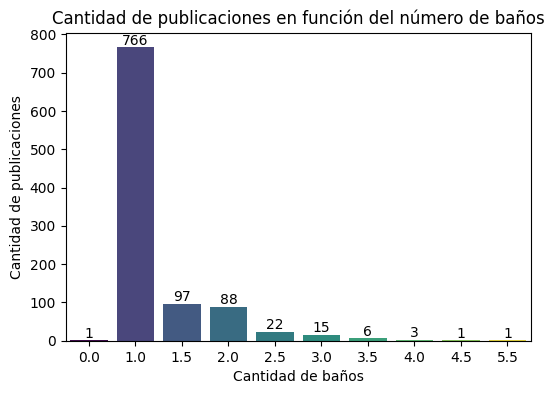

In [70]:
#GRÁFICO BAÑOS

#Agrupamos el df por la columna "baños"
pat_arg_baños = pat_arg.groupby("baños").size().reset_index(name='count')

# Se define el tamaño de la figura.
plt.figure(figsize=(6,4))

# Se genera el gráfico de barras.
graf_baños = sns.barplot(data=pat_arg_baños, x='baños', y='count', hue='baños', palette='viridis', legend=False)
plt.title("Cantidad de publicaciones en función del número de baños")
plt.xlabel("Cantidad de baños")
plt.ylabel("Cantidad de publicaciones")

# Se añade el valor de la frecuencia para cada barra.
for p in graf_baños.patches:
    height = p.get_height()
    graf_baños.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

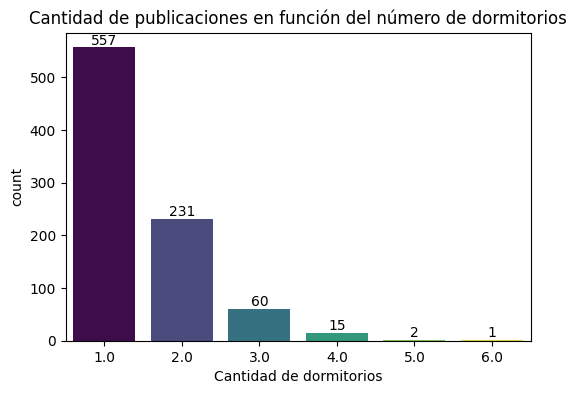

In [71]:
#GRÁFICO DORMITORIOS

# Agrupamos el df por la columna "dormitorios"
pat_arg_dorms = pat_arg.groupby("dormitorios").size().reset_index(name='count')

# Se define el tamaño de la figura.
plt.figure(figsize=(6,4))

# Se genera el gráfico de barras.
graf_dormitorios = sns.barplot(data=pat_arg_dorms, x='dormitorios', y='count', hue='dormitorios', palette='viridis', legend=False)
plt.title("Cantidad de publicaciones en función del número de dormitorios")
plt.xlabel("Cantidad de dormitorios")

# Se añade el valor de la frecuencia para cada barra.
for p in graf_dormitorios.patches:
    height = p.get_height()
    graf_dormitorios.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

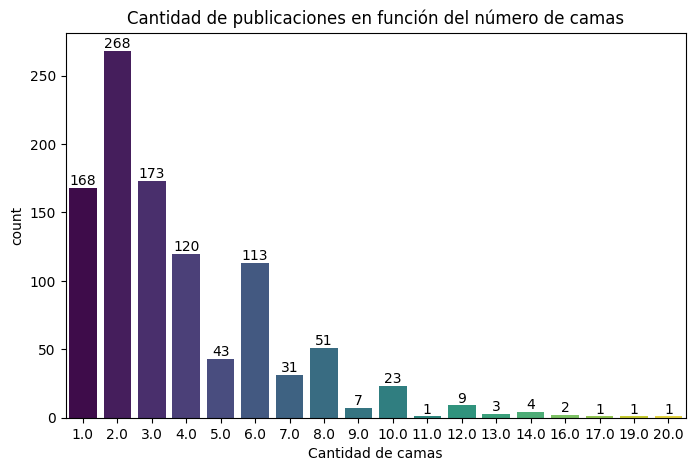

In [72]:
#GRÁFICO CAMAS

# Agrupamos el df por la columna "camas"
pat_arg_camas = pat_arg.groupby("camas").size().reset_index(name='count')

# Se define el tamaño de la figura.
plt.figure(figsize=(8,5))

# Se genera el gráfico de barras.
graf_camas = sns.barplot(data=pat_arg_camas, x='camas', y='count', hue='camas', palette='viridis', legend=False)
plt.title("Cantidad de publicaciones en función del número de camas")
plt.xlabel("Cantidad de camas")

# Se añade el valor de la frecuencia para cada barra.
for p in graf_camas.patches:
    height = p.get_height()
    graf_camas.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

**COMENTARIO - ANÁLISIS GRÁFICO PUBLICACIONES SEGÚN Nº HABITACIONES/CAMAS:**
##### La mayoría de las publicaciones (74.5%) cuentan con un solo baño, seguidas por aquellas con 1.5 y 2 baños (las cuales totalizan un 17.9%). Se observa un patrón similar en el caso de los dormitorios: a mayor cantidad de habitaciones, menor número de publicaciones. Un poco más de la mitad de los alojamientos publicados tienen un solo dormitorio (54.18%), seguidos por aquellos con dos (22.47%) y tres (5.8%).

Sin embargo, esta dinámica cambia al considerar el número de camas, mostrando un patrón menos claro. La mayoría de las publicaciones corresponden a alojamientos con dos camas (26%), superando en 10 puntos porcentuales a aquellos que cuentan con solo una (16.3%). Además, destaca una alta proporción de publicaciones con seis camas (10,9%), en comparación con aquellas que tienen cinco (4.2%).

## 8. Detección de outliers.

### Crear una variable **price_standarized** en base a la estandarización de la variable **price_original**. Identifique outliers con el criterio de 3 desvíos estándar visto en clase, y reporte la cantidad de outliers para cada ciudad (**city**) ordenados de mayor a menor.

In [73]:
#Se observa la distribución de la variable a considerar price_original.
pat_arg["price_original"].describe()

,price_original
count,1028.000000
mean,71.090467
std,58.885053
min,9.000000
25%,39.000000
50%,56.000000
75%,80.000000
max,699.000000


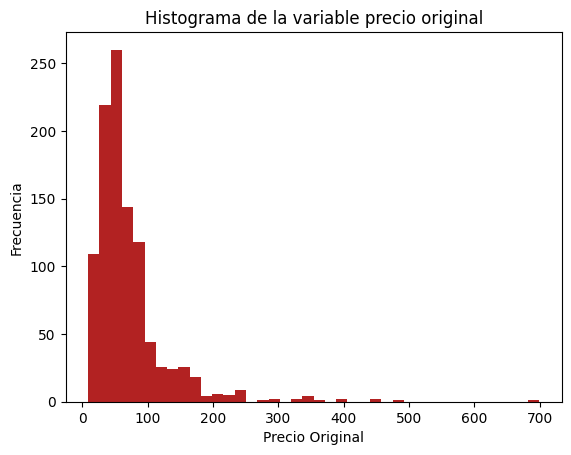

In [74]:
# Se realiza el histograma de la variable antes de estandarizar
plt.hist(pat_arg["price_original"], bins=40, ec='black', color="firebrick")
# Titulo y ejes del gráfico
plt.xlabel("Precio Original")
plt.ylabel("Frecuencia")
plt.title(f"Histograma de la variable precio original")
plt.show()

**COMENTARIO - HISTOGRAMA PRECIO ORIGINAL:**

Por la forma que tiene la distribución en el Histograma, alejada de una campana simétrica, inicialmente parece más adecuado aplicar el método de normalización, sin embargo, dado que la letra del Trabajo solicita estandarizar, se aplicará dicho método para el reescalamiento.

Por otra parte, el método de estandarización resulta más robusto respecto a los valores extremos, como es el caso que se observa dentro de la distribución del presente histograma.

In [75]:
# Función para estandarizar variables
def estandarizar_var(X):
  promedio = np.mean(X)
  desvio = np.std(X)
  X_estandarizada = (X-promedio)/desvio
  return X_estandarizada

# Se genera la variable estandarizada: price_standarized
pat_arg["price_standarized"] = estandarizar_var(pat_arg["price_original"])
pat_arg["price_standarized"].describe()

,price_standarized
count,1.028000e+03
mean,6.911894e-17
std,1.000487e+00
min,-1.054948e+00
25%,-5.452332e-01
50%,-2.563946e-01
75%,1.513775e-01
max,1.066850e+01


**COMENTARIO ESTANDARIZACIÓN:**

Se observa que la variable estandarizada, price_standarized, tiene un promedio prácticamente igual a cero y su desvío es aproximadamente igual uno, coherente con dicho método.

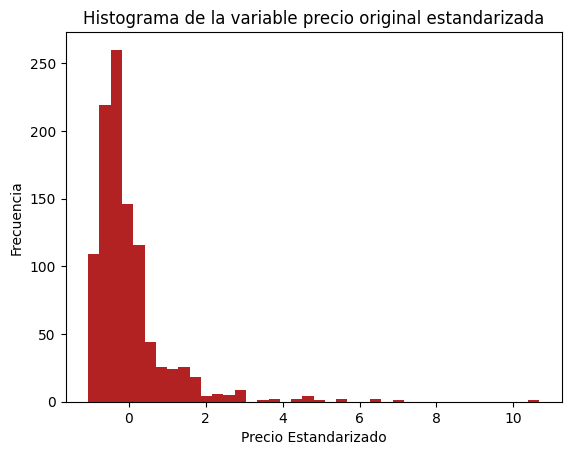

In [76]:
# Se realiza el histograma de la variable para observar su comportamiento
plt.hist(pat_arg["price_standarized"], bins=40, ec='black', color="firebrick")
# Titulo y ejes del gráfico
plt.xlabel("Precio Estandarizado")
plt.ylabel("Frecuencia")
plt.title(f"Histograma de la variable precio original estandarizada")
plt.show()

**COMENTARIOS - HISTOGRAMA:**

1. La variable de precio original estandarizado (price_standarized), tiene una distribución que no se aproxima a una distribución normal, y presenta diversos outliers, algunos extremos.

2. Hay valores negativos y por lo tanto pueden haber outliers negativos. Se utilizaría el valor absoluto para identificarlos.

In [77]:
# Se crea un df donde se filtra por la aparición de los outliers del precio, cuando su z-score, supere, en valor absoluto, el valor límite  de desvíos estándar estipulado
valor_limite = 3
outliers_precio = pat_arg[np.abs(pat_arg["price_standarized"])>valor_limite]

# Se reporta la cantidad de outliers para cada ciudad (city) ordenados de mayor a menor.
# En este caso se utiliza la columna city_clean, con las ciudades ajustadas.
outliers_precio_ciudad = outliers_precio.groupby("city_clean")["price_standarized"].count().sort_values(ascending=False).reset_index()

# Se renombran las columnas para reportar la cantidad de outliers para cada ciudad (city) ordenados de mayor a menor.
print("\033[1;30m" "Cantidad de outliers por ciudad")
outliers_precio_ciudad.rename(columns= {"city_clean":"ciudad", "price_standarized":"cantidad_outliers"})

Cantidad de outliers por ciudad


,ciudad,cantidad_outliers
0,bariloche,11
1,villa la angostura,3
2,ushuaia,2
3,cushamen,1
4,los lagos,1
5,la villa,1
6,san martin de los andes,1
7,villa llao llao,1


### Mirando los resultados en general (no por ciudad) y observando en particular la columna generada price_category. Indique cuantos outliers hay por cada categoría de precio (alto / medio / bajo) y grafíquelos en un gráfico de barras.

In [78]:
# Se reporta la cantidad de outliers agrupado por la columna disretizada price_category.
outliers_precio_standarized = outliers_precio.groupby("price_category", observed=False)["price_standarized"].count().reset_index()

# Se renombran las columnas para reportar la cantidad de outliers para cada ciudad (city) ordenados de mayor a menor.
print("\033[1;30m" "Cantidad de outliers por categoría de precio")
outliers_precio_standarized.rename(columns= {"price_standarized":"cantidad_outliers"})

Cantidad de outliers por categoría de precio


,price_category,cantidad_outliers
0,bajo,0
1,medio,19
2,alto,2


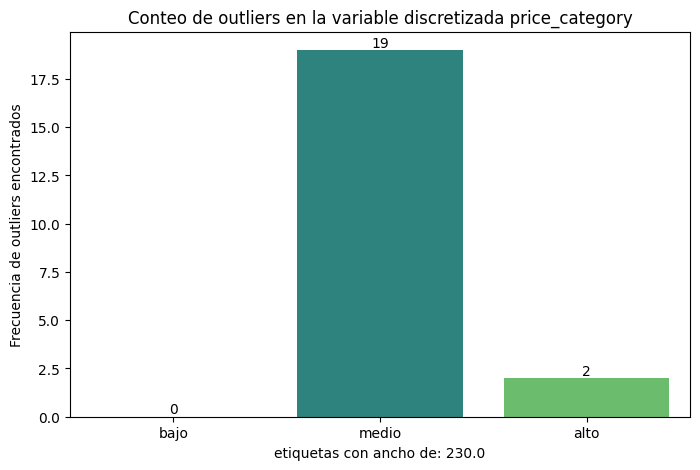

In [79]:
# Gráfico de barras con la cantidad de outliers encontrados para la variable "price_category", aplicando la estandarización en el price_original (price_standarized).

# Se define el tamaño de la figura.
plt.figure(figsize=(8,5))

ax = sns.barplot(x=etiquetas_price, y=outliers_precio.groupby("price_category", observed=False)["price_standarized"].count(), hue=etiquetas_price, errorbar=None, palette="viridis")
plt.title("Conteo de outliers en la variable discretizada price_category")
plt.xlabel(f"etiquetas con ancho de: {ancho_price_category}")
plt.ylabel("Frecuencia de outliers encontrados")

# Se añade el valor de la frecuencia para cada etiqueta.
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

### ¿Les parece que hay algo raro? ¿Los outliers tendrían que estar siempre en bajos o en altos? ¿Podrían estar en medios?

El resultado obtenido tiene sentido, dado que en la discretización, se obtuvo una mayoria de valores dentro de la categoria "bajo" (más del 95%). Esto quiere decir que en la estandarización, todos los apartamientos a los desvios considerados, para esa categoria, pudieran dar cero (valores concentrados en torno al valor medio).

Además, se observa que el 100% de los precios en el rango "alto" son outliers, y 21 de 23 (más del 90%), de los precios en el rango "medio", lo son. Esto ocurre porque el "centro de datos", cae en el rango "bajo", y sus n desvios, prácticamente también lo hacen.

**OBSERVACIÓN:** En los casos de outliers identificados, no se ha estudiado si la presencia de outliers se debe a un error de medición o carga de dato o es una variabilidad propia de los datos.

### Si se hubiera realizado una discretización de igual frecuencia ¿Cómo cree que hubiera cambiado esto?

Discretizando por igual frecuencia se hubiera obtenido un resultado diferente, dado que los bins quedan definidos de modo que en cada uno haya la misma cantidad de observaciones. Para lograr la misma cantidad de estimaciones por bin, lo que ocurrirá principalmente es que se acortará el ancho del primero, y se estirará considerablemente el ancho del último bin (donde se presentaban outliers o valores distantes del resto de los datos).

In [80]:
#Discretización por frecuencia, para determinar los anchos variables
_ , bins_igual_frecuencia = pd.qcut(x=pat_arg["price_original"], q=3, retbins=True)
bins_igual_frecuencia

array([  9.,  45.,  71., 699.])

**OBSERVACIÓN:** Los intervalos de igual ancho se encuentran definidos por aproximadamente 230, pero tienen una cantidad variable de alojamientos. Los intervalos de igual frecuencia tienen una longitud variable [(0.9, 45.0] < (45.0, 71.0] < (71.0, 699.0]], pero en cada uno de ellos se encuentra aproximadamente el 33,34% de los alojamientos.

A continuación se muestra un ejemplo de los cambios en las etiquetas obtenidas para cada método de discretización:

In [81]:
#Discretizamos la variable "price_original" por frecuencia, considerando 3 cuantiles (33,34% de observaciones por grupo), y las mismas etiquetas que las utilizadas para igual ancho.
pat_arg["price_category_frec"] = pd.qcut(x=pat_arg["price_original"], q=3, labels=etiquetas_price)
pat_arg.loc[:, ("id_alojamiento", "price_original", "price_category", "price_category_frec")].sample(10)

,id_alojamiento,price_original,price_category,price_category_frec
992,8922788,26,bajo,bajo
751,15493364,25,bajo,bajo
858,916571989269028033,30,bajo,bajo
501,35305521,60,bajo,medio
418,545022151966438713,81,bajo,alto
604,833175601621381109,54,bajo,medio
544,916738743930751566,35,bajo,bajo
160,715234401046472374,45,bajo,bajo
224,840591995681353436,83,bajo,alto
581,787139916703144070,45,bajo,bajo


## 9. Análisis estacional y de duración.

### Analizar si existe una variación estacional en los precios agrupando por mes de check_in. Mostrar esta variación en un gráfico de barras.

In [82]:
# Se comenienza analizando y realizando una limpieza en la columna "check_in"
pat_arg["check_in"].unique()

array(['2023-07-01', '2023-08-01', '2023-07-02', '2023-07-09',
       '2023-07-15', '2023-07-11', '2023-08-09', '2023-07-10',
       '2023-07-23', '2023-07-07', '2023-07-05', '2023-08-02',
       '2023-07-03', '2023-07-25', '2023-07-31', '2023-09-10',
       '2023-09-01', '2023-07-30', '2023-07-24', '2023-07-12',
       '2023-07-27', '2024-01-15', '2023-08-11', '2023-10-02',
       '2023-07-08', '2023-09-07', '2023-12-01', '2023-07-04',
       '2023-07-18', '2023-09-14', '2023-07-17', '2024-01-01',
       '2024-04-01', '2023-12-29', '2023-07-26', '2023-07-22',
       '2023-08-07', '2023-08-17', '2023-10-01', '2023-09-13',
       '2023-07-28', '2024-05-01', '2023-09-04', '2023-08-12',
       '2023-07-14', '2023-09-05', '2023-08-27', '2023-08-13',
       '2023-09-17', '2023-10-05', '2023-08-15', '2023-08-19',
       '2023-09-18', '2023-08-03', '2023-09-20', '2023-08-04',
       '2023-08-28', '2023-07-21', '2023-09-03', '2023-08-22',
       '2023-09-02', '2023-09-25', '2023-08-10', '2023-

In [83]:
# Se genera un df auxiliar para trabajar con las fechas de check_in y check_out
fechas = pat_arg[["id_alojamiento", "provincia", "city", "price_original", "check_in", "check_out"]]

# Se quiere generar la columna de mes de check_in, para ello se debe trabajar con la variable en formato string
fechas.loc[:,"check_in"] = fechas["check_in"].astype(str)

# Se separa la fecha en año, mes y dia de check_in, en otro df y luego se concatena
fechas_check_in = fechas["check_in"].str.split(pat="[-]", expand=True)
fechas_check_in.rename(columns={0:"año_check_in", 1:"mes_check_in", 2:"dia_check_in"}, inplace=True)
fechas = pd.concat([fechas, fechas_check_in["mes_check_in"]], axis=1)

# Se estudia la estacionalidad por los precios, mediante el máximo, mínimo y promedio, agrupados por mes de check_in
estacionalidad = fechas.groupby("mes_check_in").agg(precio_promedio = ("price_original", "mean"), precio_mínimo = ("price_original", "min"),
                                                    precio_máximo = ("price_original", "max")).reset_index()
print("\033[1;30m" "Variación estacional en los precios agrupando por mes de check_in.")
estacionalidad

Variación estacional en los precios agrupando por mes de check_in.


,mes_check_in,precio_promedio,precio_mínimo,precio_máximo
0,01,48.333333,12,75
1,02,65.000000,65,65
2,03,36.000000,36,36
3,04,45.000000,45,45
4,05,20.000000,20,20
5,07,67.323383,9,480
6,08,87.056911,18,450
7,09,96.058824,20,699
8,10,55.947368,22,150
9,11,53.000000,26,91


**OBSERVACIÓN:** No hay registros para el mes de junio (06), por lo tanto, cuando se realice la gráfica de barras se mostrará un total de 11 valores.

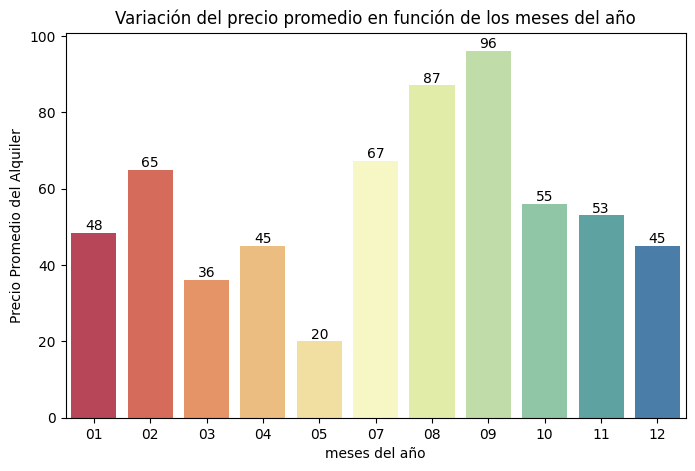

In [84]:
# Gráfico de barras con la variación del precio promedio en función del mes de check_in.
# Se define el tamaño de la figura.
plt.figure(figsize=(8,5))

# Se genera el gráfico de barras.
ax = sns.barplot(x=estacionalidad["mes_check_in"],
                 y=estacionalidad["precio_promedio"],
                 hue=estacionalidad["mes_check_in"],
                 errorbar=None, palette="Spectral")
plt.title("Variación del precio promedio en función de los meses del año")
plt.xlabel(f"meses del año")
plt.ylabel("Precio Promedio del Alquiler")

# Se añade el valor de la frecuencia para cada etiqueta.
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

Se observa que los meses con mayor precio promedio se corresponden con julio,  agosto y septiembre, donde tambien se observa, en el DataFrame agrupado, la ocurrencia de los precios máximos.

Los resultados obtenidos tienen sentido, dado que los datos provienen de la región de la Patagonia Argentina, donde la temporada alta ocurre en invierno, y durante este período, tanto los alojamientos como otros servicios suelen tener precios más elevados, debido a la gran cantidad de afluencia de turistas que visitan la región.

### Duración de las estancias. Calcular la duración de cada estancia utilizando las columnas check_in y check_out. Crear una nueva columna stay_duration que contenga la duración en días.

In [85]:
# Se convierten las variables check_in y check_out a date
pat_arg["check_in"] = pd.to_datetime(pat_arg["check_in"], format="%Y-%m-%d")
pat_arg["check_out"] = pd.to_datetime(pat_arg["check_out"], format="%Y-%m-%d")

# Se calcula la duración de cada estancia, creando la variable stay_duration
pat_arg["stay_duration"] = (pat_arg["check_out"] - pat_arg["check_in"]).dt.days
pat_arg["stay_duration"].value_counts().sort_index()

,count
stay_duration,
5,866
6,81
7,81


### ¿Existe alguna relación entre la duración de la estancia y el precio del alojamiento? Graficar esta ambas variables en un scatter plot y comentar lo observado.

In [86]:
# Refrescamos el conocimiento sobre los valores de las variables a evaluar su relación
pat_arg.loc[:, ("price_original", "stay_duration")].describe()

,price_original,stay_duration
count,1028.000000,1028.000000
mean,71.090467,5.236381
std,58.885053,0.581740
min,9.000000,5.000000
25%,39.000000,5.000000
50%,56.000000,5.000000
75%,80.000000,5.000000
max,699.000000,7.000000


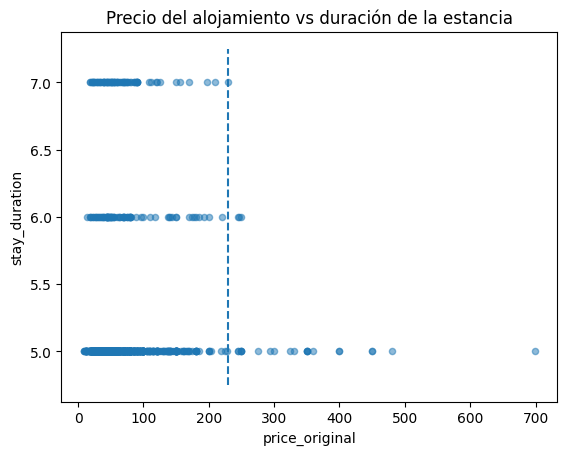

In [87]:
pat_arg.plot.scatter(x="price_original", y="stay_duration", alpha=0.5)
plt.vlines(x=ancho_price_category, ymin=pat_arg["stay_duration"].min()-0.25, ymax=pat_arg["stay_duration"].max()+0.25, linestyles='dashed')
plt.title("Precio del alojamiento vs duración de la estancia")
plt.show()

**COMENTARIO SCATTER PLOT:**

Del scatter plot se observa que, si el precio del alojamiento es alto, la duración de la estancia, es probablemente menor, aunque eso no invalida que alojamientos con menor precio también tengan duración de menos días de estancia.
Se observa que los precios por encima de 230 (por encima del price_category = "baja"), no tienen estancias con la duración más larga (7 días). Es decir, estancias con precios "medio" y "alto", tienden a ser más cortos en duración.

## 10. Correlación entre precio y características.

#### Habiendo creado las columnas baños, dormitorios y camas en el punto 7, agrupar el dataset por cada una de ellas, calcular el promedio de price_original y graficar cada una utilizando gráficos de barras ¿Qué observan? ¿Hay alguna tendencia? ¿Siempre se cumple?

In [88]:
# Agrupamos el dataset por la columna "baños", "dormitorios" y "camas" y calculamos el precio promedio en cada caso.
precio_baños = pat_arg.groupby("baños")["price_original"].mean().reset_index()
precio_dormitorios = pat_arg.groupby("dormitorios")["price_original"].mean().reset_index()
precio_camas = pat_arg.groupby("camas")["price_original"].mean().reset_index()

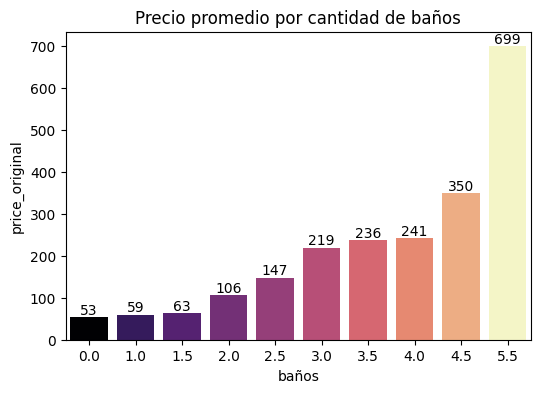

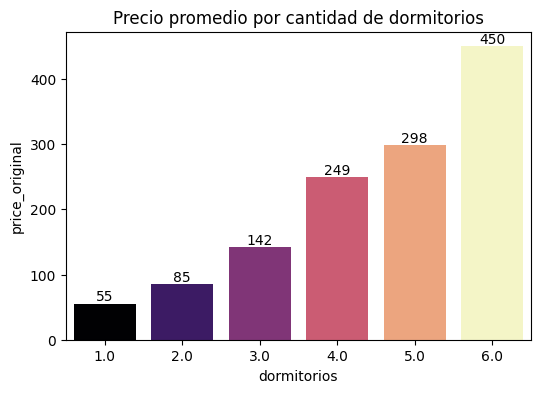

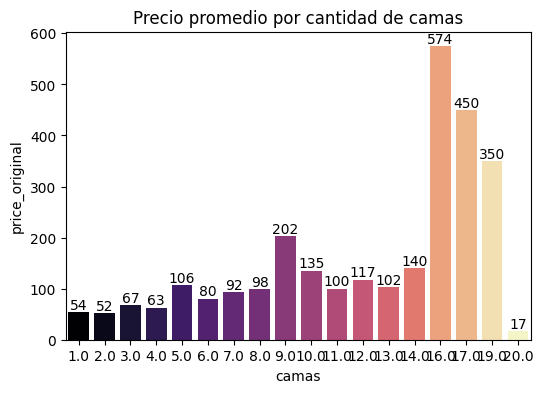

In [89]:
# Gráfico de barras de precio_baños
plt.figure(figsize=(6,4))
graf_precio_baños = sns.barplot(x="baños", y="price_original", data=precio_baños, palette="magma", hue="baños", legend=False)
plt.title("Precio promedio por cantidad de baños")

for p in graf_precio_baños.patches:
    height = p.get_height()
    graf_precio_baños.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

# Gráfico de barras de precio_dormitorios
plt.figure(figsize=(6,4))
graf_precio_dormitorios = sns.barplot(x="dormitorios", y="price_original", data=precio_dormitorios, palette="magma", hue="dormitorios", legend=False)
plt.title("Precio promedio por cantidad de dormitorios")

for p in graf_precio_dormitorios.patches:
    height = p.get_height()
    graf_precio_dormitorios.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

# Gráfico de barras de precio_camas
plt.figure(figsize=(6,4))
graf_precio_camas = sns.barplot(x="camas", y="price_original", data=precio_camas, palette="magma", hue="camas", legend=False)
plt.title("Precio promedio por cantidad de camas")

for p in graf_precio_camas.patches:
    height = p.get_height()
    graf_precio_camas.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

**COMENTARIO - ANÁLISIS GRÁFICO: PRECIO PROMEDIO SEGÚN Nº HABITACIONES/CAMAS:**
##### En términos generales se observa que a mayor cantidad de habitaciones (tanto dormitorios como baños) el precio del alojamiento aumenta. Sin embargo, la tendencia se modifica a nivel del número de camas, expresando fluctuaciones relevantes. En este caso sería conveniente realizar el análisis en función del **tipo de hospedaje** (compartido o privado), bajo la hipótesis -exploratoria- de que puede ser una variable interviniente que modifica la relación. Si se trata de un alojamiento compartido (tipo hostel) un mayor número de camas no implica necesariamente mayores comodidades, mientras que sí puede significarlo a nivel del alojamiento privado. Por otro lado, un mayor número de baños y/o dormitorios suele significar menores niveles de hacinamiento y mayores comodidades independientemente de que se trate o no de un alojamiento compartido.

#### Posteriormente, sobre el dataset sin agrupar, calcular la correlación de price_original Vs. cada una de esas columnas (baños, dormitorios y camas) ¿Cuál se asocia más fuertemente con el precio? (Recordar: Correlación no implica causalidad).

In [90]:
# Calculamos la correlación entre el precio del alojamiento y la cantidad de baños
corr_baños = pat_arg["price_original"].corr(pat_arg["baños"])
print("\033[1;30m" f"La correlación entre el precio del alojamiento y el número de baños es de {corr_baños}")

La correlación entre el precio del alojamiento y el número de baños es de 0.5853102854630752


In [91]:
# Calculamos la correlación entre el precio del alojamiento y la cantidad de dormitorios
corr_dormitorios = pat_arg["price_original"].corr(pat_arg["dormitorios"])
print("\033[1;30m" f"La correlación entre el precio del alojamiento y el número de dormitorios es de {corr_dormitorios}")

La correlación entre el precio del alojamiento y el número de dormitorios es de 0.5704362603422711


In [92]:
# Calculamos la correlación entre el precio del alojamiento y la cantidad de camas
corr_camas = pat_arg["price_original"].corr(pat_arg["camas"])
print("\033[1;30m" f"La correlación entre el precio del alojamiento y el número de camas es de {corr_camas}")

La correlación entre el precio del alojamiento y el número de camas es de 0.4361286690986579


##### Se observa una correlación positiva **moderada** entre el precio del alojamiento y la cantidad de habitaciones, tanto a nivel de baños (0,58:  constituyendo la asociación más fuerte) como de dormitorios (0,57). Sin embargo, y en consonancia con observaciones anteriores (a partir de gráficos de barras), se identifica una correlación positiva **débil** entre el precio del alojamiento y la cantidad de camas.

##### ANÁLISIS GRÁFICO ADICIONAL.

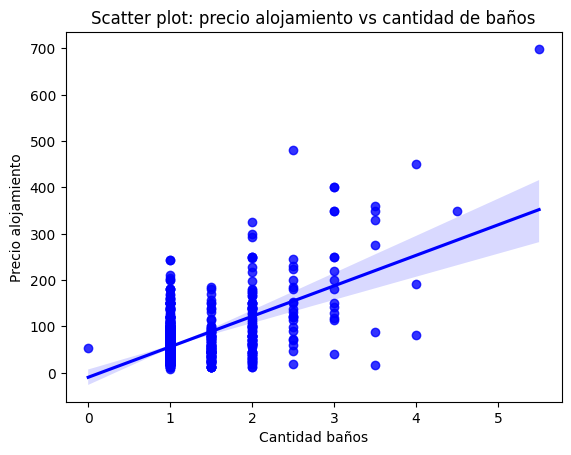

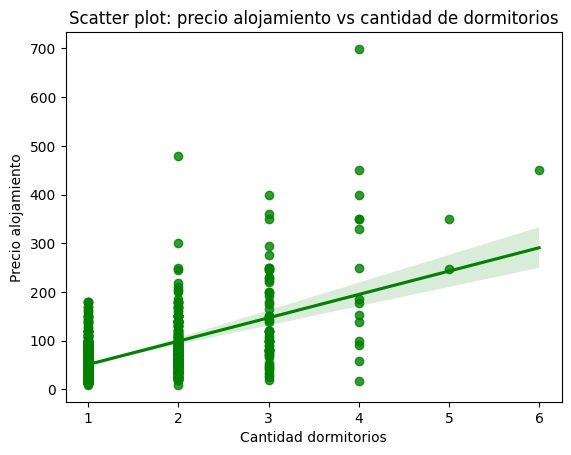

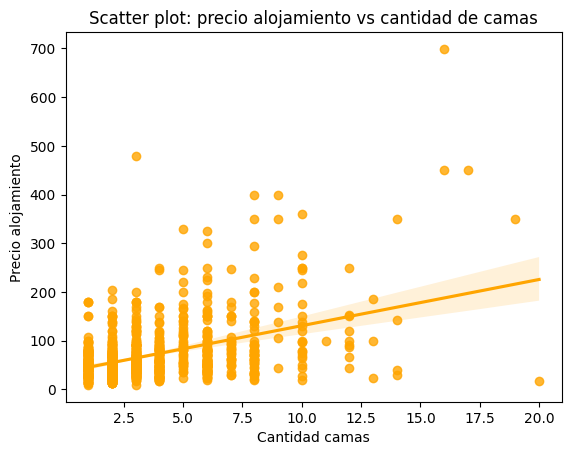

In [93]:
# ANÁLISIS GRÁFICO 1.

# Visualizamos las correlaciones de manera gráfica (para cada "amenitie" por separado)

# Scatter plot (con línea de regresión) de baños vs price_original
scatter_baños = sns.regplot(data=pat_arg, x="baños", y="price_original", fit_reg=True, color="blue", label="baños")
plt.title('Scatter plot: precio alojamiento vs cantidad de baños')
plt.xlabel('Cantidad baños')
plt.ylabel('Precio alojamiento')
plt.show()

# Scatter plot (con línea de regresión) de dormitorios vs price_original
scatter_dormitorios = sns.regplot(data=pat_arg, x="dormitorios", y="price_original", fit_reg=True, color="green", label="dormitorios")
plt.title('Scatter plot: precio alojamiento vs cantidad de dormitorios')
plt.xlabel('Cantidad dormitorios')
plt.ylabel('Precio alojamiento')
plt.show()

# Scatter plot (con línea de regresión) de camas vs price_original
scatter_camas = sns.regplot(data=pat_arg, x="camas", y="price_original", fit_reg=True, color="orange", label="camas")
plt.title('Scatter plot: precio alojamiento vs cantidad de camas')
plt.xlabel('Cantidad camas')
plt.ylabel('Precio alojamiento')
plt.show()


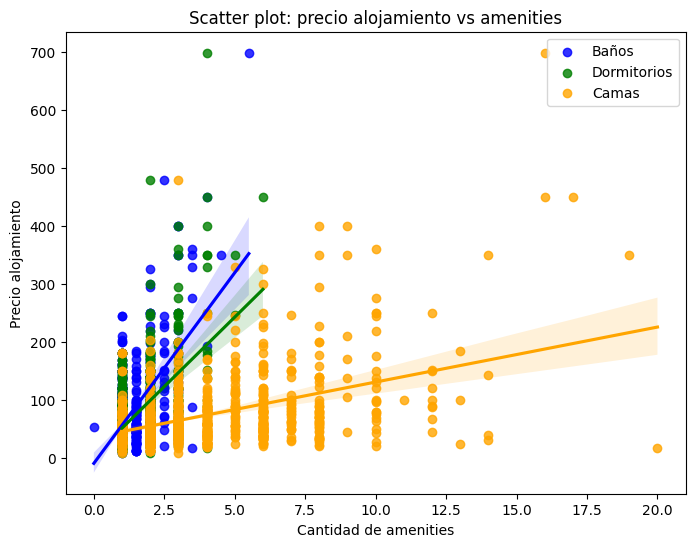

In [94]:
# ANÁLISIS GRÁFICO 2.

# Visualizamos las correlaciones de manera gráfica (de todas las "amenities" juntas, para facilitar el análisis)
plt.figure(figsize=(8, 6))

# Se definen labels específicas en cada caso
sns.regplot(data=pat_arg, x="baños", y="price_original", fit_reg=True, color="blue", label="Baños")
sns.regplot(data=pat_arg, x="dormitorios", y="price_original", fit_reg=True, color="green", label="Dormitorios")
sns.regplot(data=pat_arg, x="camas", y="price_original", fit_reg=True, color="orange", label="Camas")

plt.title("Scatter plot: precio alojamiento vs amenities")
plt.xlabel("Cantidad de amenities")
plt.ylabel("Precio alojamiento")

# Se añade una leyenda con plt.legend(), que usa las etiquetas definidas en sns.regplot
plt.legend()
plt.show()

**COMENTARIO - ANÁLISIS GRÁFICO DE CORRELACIONES (adicional):**
###### Si bien para que el scatter plot resulte de mayor utilidad es conveniente que ambas variables sean continuas, en este caso (variable discreta ordinal a nivel de cantidad de "amenities"), consideramos que se cuenta con un ranglo amplio de valores posibles y se opta por graficarlo de igual modo. En los tres casos el análisis gráfico resulta consistente con el valor de correlación de Pearson obtenido anteriormente con el método .corr de Pandas. En el caso de "camas" el agrupamiento de puntos puede ser informativo para ver cómo se distribuyen los datos, pero no muestra una tendencia clara (correlación positiva débil).

In [95]:
pat_arg.head()
#

,id_alojamiento,name,category,rating,city,latitude,longitude,characteristics,check_in,check_out,...,habitaciones_best_reviews,discounted,city_clean,price_category,baños,dormitorios,camas,price_standarized,price_category_frec,stay_duration
0,42980235,Depto. Centro de Neuquén. Wifi. Late check out.,entire_home,4.700000,Neuquén,-38.952190,-68.057380,"[1 cama, 1 dormitorio, 1 baño, 1 cama doble, W...",2023-07-01,2023-07-06,...,False,False,neuquen,bajo,1.0,1.0,2.0,-0.817081,bajo,5
1,910778141360333867,Cómodo Monoambiente en Neuquen-zona Alto Comahue,entire_home,4.811295,Neuquén,-38.942283,-68.064472,"[1 cama, 1 dormitorio, 1 baño, Wifi]",2023-08-01,2023-08-08,...,False,True,neuquen,bajo,1.0,1.0,1.0,-0.902034,bajo,7
2,50265327,Moderno monoambiente Neuquino - El Bunker 128,entire_home,4.600000,Neuquén,-38.957577,-68.050903,"[1 cama, Monoambiente, 1 baño, 1 cama doble, E...",2023-07-01,2023-07-06,...,False,True,neuquen,bajo,1.0,NaN,2.0,-0.834072,bajo,5
3,716439197957114546,Hermoso departamento de un dormitorio en Neuquén,entire_home,4.900000,Neuquén,-38.947662,-68.060772,"[2 camas, 1 dormitorio, 1 baño, 1 cama king, 1...",2023-07-01,2023-07-06,...,False,False,neuquen,bajo,1.0,1.0,3.0,-0.375328,medio,5
4,12904217,"Depto 1 dorm céntrico, excelente!",entire_home,4.800000,Neuquen,-38.953350,-68.052350,"[1 cama, 1 dormitorio, 1 baño, 1 cama doble, E...",2023-07-02,2023-07-07,...,False,False,neuquen,bajo,1.0,1.0,2.0,-0.409309,medio,5
